# Speedrun\.com API in Python

by Jay G. Crawford, Michael T. Moen, and Avery Fernandez

**Speedrun\.com API Documentation**: https://github.com/speedruncomorg/api/blob/master/version1/README.md

**Speedrun\.com Terms of Use**: https://www.speedrun.com/pages/terms-of-use

The Speedrun\.com API is a web-based service provided by Speedrun.com, the largest community and resource for speedrunning video games. Speedrunning is the practice of completing a game or a portion of it as quickly as possible, often with specific rules or categories. The Speedrun\.com API enables developers to access and interact with the extensive database of speedrun records, leaderboards, games, categories, users, and more hosted on the Speedrun\.com platform.

The Speedrun\.com API is licensed under [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/), allowing its data to be shared and adapted for non-commercial purposes as long as proper attribution is given. 

#### Key Features of the Speedrun\.com API:

1. **Game Information:**
   - Retrieve detailed information about various games available on Speedrun\.com, including game titles, release dates, and associated categories.

2. **Category Data:**
   - Access information about different speedrunning categories for each game. Categories define specific rules and objectives for speedruns, such as "Any%", "100%", or unique challenges like "16 Star" in Super Mario 64.

3. **Leaderboards:**
   - Fetch leaderboard data to see the top-performing speedruns for a particular game and category. This includes detailed run information, such as the runner, completion time, and submission date.

4. **Run Details:**
   - Obtain comprehensive data about individual speedrun attempts, including player information, run times, and dates. This allows for in-depth analysis and tracking of speedrun progress and history.

5. **User Profiles:**
   - Access user profile data to get information about speedrunners, including their usernames, social media links, and their submitted runs and achievements.

6. **Platform and Region Information:**
   - Retrieve data related to the platforms (e.g., PC, console) and regions (e.g., NTSC, PAL) used for specific runs, providing context for different versions and conditions under which the runs were performed.

#### Rate Limiting and Usage:

- **Rate Limit:**
  - *Each IP address is allowed to perform a maximum of 100 requests per minute.* This rate limit ensures fair usage and prevents abuse of the API.

- **Authentication:**
  - While some endpoints are publicly accessible, certain actions and higher rate limits may require users to authenticate using their personal API keys, which can be obtained by registering on Speedrun\.com.

*These recipes were tested on September 18, 2024.*

## Setup

### User Agent

Create a Python file (e.g., agent_info.py) to store your API key. Replace `"YourFirstName YourLastName", "YourEmail"` with your information.

In [122]:
myinfo = {"User-Agent": "Project-name/version"}

In [123]:
from agent_info import myinfo

### Import Libraries 

This tutorial uses the following libraries:

In [124]:
import requests
from time import sleep
import matplotlib.pyplot as plt
from datetime import datetime
from pprint import pprint
import pandas as pd

## 1. Finding the Top Users in a Category

To find info on the endpoints available through the Speedrun\.com API and the parameters needed to access its data, we recommend using [the official GitHub repository](https://github.com/speedruncomorg/api/tree/master/version1).

The example below retrieves the leaderboard data from the 70-Star category (abbreviated as `70_Star`) from Super Mario 64 (abbreviated as `sm64`):

In [146]:
game = 'sm64'
category = '70_Star'

url = f'https://www.speedrun.com/api/v1/leaderboards/{game}/category/{category}?'
data_retrieved = requests.get(url, headers=myinfo).json()

# Print structure of returned data
pprint(data_retrieved, depth=2)

{'data': {'category': '7dgrrxk4',
          'emulators': None,
          'game': 'o1y9wo6q',
          'level': None,
          'links': [...],
          'platform': None,
          'region': None,
          'runs': [...],
          'timing': 'realtime',
          'values': {},
          'video-only': False,
          'weblink': 'https://www.speedrun.com/sm64#70_Star'}}


Using `data_retrieved["data"]["runs"]`, we can access all the runs that have been uploaded to the 70-Star category in SM64.

In [126]:
# Display number of runs submitted
len(data_retrieved["data"]["runs"])

2608

Next, we can print the data of the top run in the Super Mario 64 category.

In [127]:
# Display data associated with the first run
data_retrieved["data"]["runs"][0]

{'place': 1,
 'run': {'id': 'znev0n9z',
  'weblink': 'https://www.speedrun.com/sm64/run/znev0n9z',
  'game': 'o1y9wo6q',
  'level': None,
  'category': '7dgrrxk4',
  'videos': {'links': [{'uri': 'https://www.twitch.tv/videos/1999441448'}]},
  'comment': 'Mod note: Retimed to 46:28. Set to verified:no due to frame drops at 24:24.',
  'status': {'status': 'verified',
   'examiner': 'pj0zm38w',
   'verify-date': '2023-12-10T21:11:33Z'},
  'players': [{'rel': 'user',
    'id': 'zxzk1q9x',
    'uri': 'https://www.speedrun.com/api/v1/users/zxzk1q9x'}],
  'date': '2023-12-09',
  'submitted': '2023-12-09T14:06:38Z',
  'times': {'primary': 'PT46M28S',
   'primary_t': 2788,
   'realtime': 'PT46M28S',
   'realtime_t': 2788,
   'realtime_noloads': None,
   'realtime_noloads_t': 0,
   'ingame': None,
   'ingame_t': 0},
  'system': {'platform': 'w89rwelk', 'emulated': False, 'region': 'pr184lqn'},
  'splits': None,
  'values': {'e8m7em86': '9qj7z0oq', 'kn04ewol': '4qyxop3l'}}}

In [128]:
# Find the user id of the runners associated with the first run
users = data_retrieved["data"]["runs"][0]["run"]["players"]
users

[{'rel': 'user',
  'id': 'zxzk1q9x',
  'uri': 'https://www.speedrun.com/api/v1/users/zxzk1q9x'}]

We can use the URI in the response to find the user's username:

In [129]:
user_data = requests.get(users[0]['uri'], headers=myinfo).json()
user_data["data"]["names"]["international"]

'ikori_o'

Now, we can find the usernames and times for the top 10 runs:

In [130]:
for idx, run in enumerate(data_retrieved["data"]["runs"][:10]):
    # Call the user endpoint to get the player's username
    user_url = run["run"]["players"][0]["uri"]
    user_data = requests.get(user_url, headers=myinfo).json()
    username = user_data["data"]["names"]["international"]

    sleep(1)

    # Convert the run time into minutes and seconds
    minutes = run["run"]["times"]["primary_t"] // 60
    seconds = run["run"]["times"]["primary_t"] % 60

    # Print the top 10 runners with the best times
    print(f'{idx+1:<2} {username:<10} {minutes:02}:{seconds:02}')

1  ikori_o    46:28
2  Suigi      46:41
3  taihou     46:42
4  Finnii602  46:46
5  Parsee02   46:54
6  Benji64    46:56
7  Weegee     46:58
8  Dwhatever  46:59
9  Goldrush   46:59
10 Mauir      47:01


## 2. Finding the Top Runs & Progression for a User

This code example focuses on finding the top runs and tracking the progression of a specific player's speedrun times within a given game and category on Speedrun\.com. By leveraging the Speedrun\.com API, the script fetches detailed information about the player's runs and visualizes their performance over time.

In [152]:
game = 'sm64'
category = '70_Star'

url = f'https://www.speedrun.com/api/v1/leaderboards/{game}/category/{category}'
data_retrieved = requests.get(url, headers=myinfo).json()['data']

# Extract game and category IDs from the response
game_id = data_retrieved['game']
category_id = data_retrieved['category']

# Print data for the top run
data_retrieved['runs'][0]['run']

{'id': 'znev0n9z',
 'weblink': 'https://www.speedrun.com/sm64/run/znev0n9z',
 'game': 'o1y9wo6q',
 'level': None,
 'category': '7dgrrxk4',
 'videos': {'links': [{'uri': 'https://www.twitch.tv/videos/1999441448'}]},
 'comment': 'Mod note: Retimed to 46:28. Set to verified:no due to frame drops at 24:24.',
 'status': {'status': 'verified',
  'examiner': 'pj0zm38w',
  'verify-date': '2023-12-10T21:11:33Z'},
 'players': [{'rel': 'user',
   'id': 'zxzk1q9x',
   'uri': 'https://www.speedrun.com/api/v1/users/zxzk1q9x'}],
 'date': '2023-12-09',
 'submitted': '2023-12-09T14:06:38Z',
 'times': {'primary': 'PT46M28S',
  'primary_t': 2788,
  'realtime': 'PT46M28S',
  'realtime_t': 2788,
  'realtime_noloads': None,
  'realtime_noloads_t': 0,
  'ingame': None,
  'ingame_t': 0},
 'system': {'platform': 'w89rwelk', 'emulated': False, 'region': 'pr184lqn'},
 'splits': None,
 'values': {'e8m7em86': '9qj7z0oq', 'kn04ewol': '4qyxop3l'}}

In [154]:
# Extract the player ID from the response
player_id = data_retrieved['runs'][0]['run']['players'][0]['id']

# Perform an API request to find the runner's username
user_url = data_retrieved['runs'][0]['run']["players"][0]["uri"]
user_data = requests.get(user_url, headers=myinfo).json()
username = username = user_data["data"]["names"]["international"]

In [159]:
# Get the user's run for this game and category
url = f"https://www.speedrun.com/api/v1/runs?game={game_id}&category={category_id}&user={player_id}"
data = requests.get(url, headers=myinfo).json()

# Iterate through each run in the data
runs = []
for run in data['data']:
    run_entry = {
        'time': run['times']['primary_t'] / 60,  # Convert time to minutes
        'date': run.get('date', None)  # Fetch the date, if available
    }
    # Add the run entry 
    runs.append(run_entry)

# Create DataFrame
df = pd.DataFrame(runs)
df

,time,date
0,48.866667,2018-10-30
1,48.600000,2019-04-05
2,48.383333,2019-04-11
3,48.116667,2019-05-07
4,47.916667,2019-05-16
5,47.800000,2021-12-01
6,47.516667,2021-12-05
7,47.266667,2023-05-25
8,47.133333,2023-06-16
9,47.066667,2023-07-03


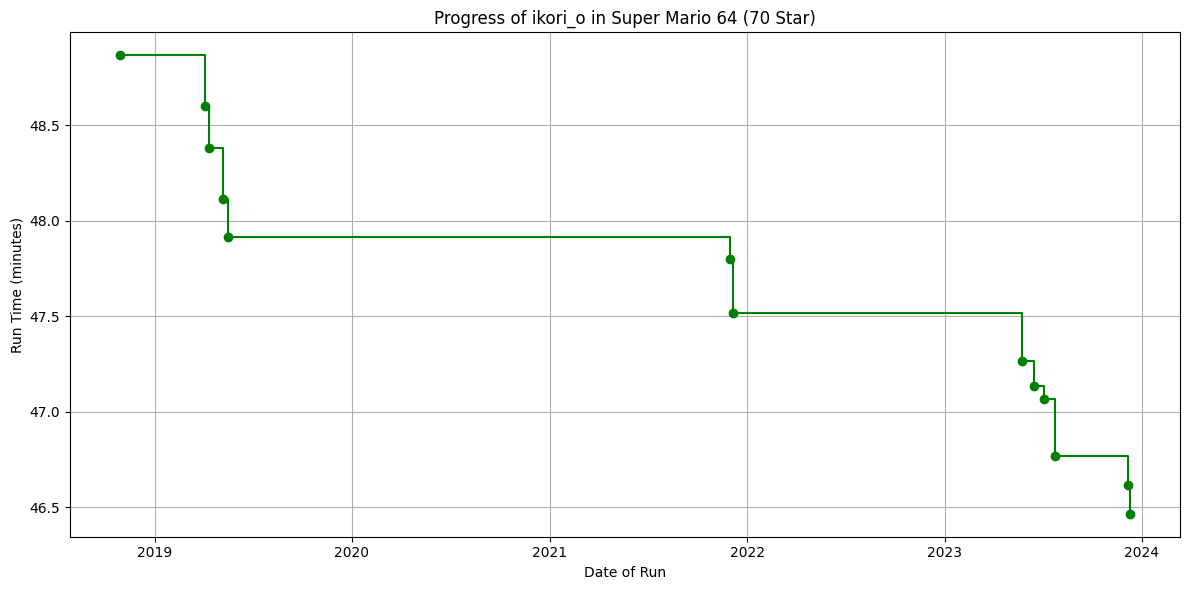

In [158]:
# Prepare data for graphing
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Create a plot to visualize the player's progress
plt.figure(figsize=(12, 6))
plt.step(df['date'], df['time'], marker='o', linestyle='-', color='green', where='post')
plt.title(f'Progress of {username} in Super Mario 64 (70 Star)')
plt.xlabel('Date of Run')
plt.ylabel('Run Time (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Graphing an Interactive World Record Progression Graph

This code fetches data from the Speedrun\.com API for Mario Kart Wii's 32 Tracks (No Skips) category, accumulates the dates and runtimes of verified runs, and identifies the progression of the world record over time. It then sorts the data and extracts the relevant dates and runtimes to graph the progression of this world record category.

### Finding the Parameter IDs

To begin, we will find the game and category IDs for Mario Kart Wii's 32 Tracks (No Skips) category. Using the `mkw` code found in the URL to the game's page on Speedrun\.com (https://www.speedrun.com/mkw), we can access the game ID and category data.

In [133]:
game = 'mkw'  # Game identifier for Mario Kart Wii

url = f'https://www.speedrun.com/api/v1/games/{game}?embed=categories.variables'
data = requests.get(url, headers=myinfo).json()['data']

# Find game ID and title
game_id = data['id']
game_title = data['names']['international']
print(f"Game ID for {game_title} is '{game_id}'\n")

print(f"Categories IDs for {game_title}:")
for category in data['categories']['data']:
    print(f'{category['id']} : {category['name']}')

Game ID for Mario Kart Wii is 'l3dxogdy'

Categories IDs for Mario Kart Wii:
wk68zp21 : 32 Tracks
7kj6mz23 : Nitro Tracks
xk9v3gd0 : Retro Tracks
7kjzwjnd : 100%
q25oz7gk : Mushroom Cup
jdrqy7lk : Flower Cup
jdz3xv62 : Star Cup
02qg6l9d : Special Cup
824xzrnd : Shell Cup
9d8pzglk : Banana Cup
xd1rz7wk : Leaf Cup
zd30z7rd : Lightning Cup


In the code above, we set the game ID for Mario Kart Wii and printed the category ID for every category. Since we are looking at the 32 Tracks category, we set the category ID below:

In [134]:
category_id = 'wk68zp21'

Since we wish to further filter the category to include only No Skips runs, we must find the value and choice IDs.

In [135]:
url = f'https://www.speedrun.com/api/v1/categories/{category_id}/variables'
data = requests.get(url, headers=myinfo).json()['data']

# Print the value IDs and names
for idx, var in enumerate(data):
    print(f"{idx} : {var['id']} : {var['name']}")

0 : j84rwjl9 : Skips
1 : wlez0kl6 : Items (32 Tracks)
2 : 5ly9mjn4 : Character
3 : wl35p9n1 : Vehicle


In [136]:
# Print choices for 'Skips' value
data[0]['values']['choices']

{'xqk9zzn1': 'No Skips', '81p4xxg1': 'Skips'}

In [137]:
value_id = 'j84rwjl9'
choice_id = 'xqk9zzn1'

### Finding the World Record Progression

In [138]:
offset = 0  # Initialize the offset for pagination and construct the initial API request URL
dates_runtimes = []  # List to store tuples of (date, runtime)

# Loop to fetch data from the API and accumulate dates and runtimes
while True:

    url = f'https://www.speedrun.com/api/v1/runs?game={game_id}&category={category_id}&status=verified&max=200&offset={offset}'
    data_retrieved = requests.get(url, headers=myinfo).json()
    sleep(1)  # Sleep to avoid hitting the rate limit
    
    # Break the loop if there is no more data
    if not len(data_retrieved['data']):
        break
    
    # Update the offset for the next batch of results
    offset += 200

    # Iterate through each run in the data
    for run in data_retrieved['data']:
        date = run.get("date", None)
        
        # Check for 'No Skips' and a valid date
        if not date or run['values'][value_id] != choice_id:
            continue  # Skip if the date is not available
        
        # Convert the runtime from seconds to minutes
        runtime = run['times']['primary_t'] / 60
        date = datetime.strptime(date, "%Y-%m-%d")

        dates_runtimes.append((date, runtime))

# Sort the list of (date, runtime) tuples by date
dates_runtimes.sort()

# Find the world record progression
wr_dates_runtimes = [dates_runtimes[0]]
for run in dates_runtimes[1:]:
    if run[1] < wr_dates_runtimes[-1][1]:
        wr_dates_runtimes.append(run)

# Unzip the list of world record (date, runtime) tuples into separate lists
dates, runtimes = zip(*wr_dates_runtimes)

### Graphing the Results

In [141]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create an interactive Plotly graph
fig = make_subplots(rows=1, cols=1)

# Add a scatter plot trace to the figure
fig.add_trace(go.Scatter(x=dates, y=runtimes, mode='lines+markers', name='Run Time', line_shape='hv'))

# Update the layout of the figure to include titles and gridlines
fig.update_layout(
    title='World Record Progression of Mario Kart Wii 32 Tracks (No Skips)',
    xaxis_title='Date',
    yaxis_title='Run Time (minutes)',
    xaxis=dict(showgrid=True),  # Enable gridlines for the x-axis
    yaxis=dict(showgrid=True)   # Enable gridlines for the y-axis
)

# Write the plot to an HTML file for offline viewing or sharing
fig.write_html("plot.html")

# Display the plot in the notebook (if working in a Jupyter notebook)
fig.show()